# Loading and Inspecting the Credit Risk Dataset

In [31]:
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error

data = pd.read_csv('credit_risk_dataset.csv')

print(data.head())
print(data.info())


   person_age  person_income  person_emp_length  loan_amnt  loan_int_rate  \
0          22          59000              123.0      35000          16.02   
1          21           9600                5.0       1000          11.14   
2          25           9600                1.0       5500          12.87   
3          23          65500                4.0      35000          15.23   
4          24          54400                8.0      35000          14.27   

   loan_status  loan_percent_income  cb_person_cred_hist_length  \
0            1                 0.59                           3   
1            0                 0.10                           2   
2            1                 0.57                           3   
3            1                 0.53                           2   
4            1                 0.55                           4   

   person_home_ownership_OTHER  person_home_ownership_OWN  ...  \
0                        False                      False  ...   
1 

In [32]:
data.columns

Index(['person_age', 'person_income', 'person_emp_length', 'loan_amnt',
       'loan_int_rate', 'loan_status', 'loan_percent_income',
       'cb_person_cred_hist_length', 'person_home_ownership_OTHER',
       'person_home_ownership_OWN', 'person_home_ownership_RENT',
       'loan_intent_EDUCATION', 'loan_intent_HOMEIMPROVEMENT',
       'loan_intent_MEDICAL', 'loan_intent_PERSONAL', 'loan_intent_VENTURE',
       'loan_grade_B', 'loan_grade_C', 'loan_grade_D', 'loan_grade_E',
       'loan_grade_F', 'loan_grade_G', 'cb_person_default_on_file_Y'],
      dtype='object')

# Preprocessing the Credit Risk Dataset and Splitting Data for Model Training

In [21]:
print(data.isnull().sum())


data = data.dropna() 

data = pd.get_dummies(data, drop_first=True)

X = data.drop('loan_status', axis=1)
y = data['loan_status']

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


person_age                     0
person_income                  0
person_emp_length              0
loan_amnt                      0
loan_int_rate                  0
loan_status                    0
loan_percent_income            0
cb_person_cred_hist_length     0
person_home_ownership_OTHER    0
person_home_ownership_OWN      0
person_home_ownership_RENT     0
loan_intent_EDUCATION          0
loan_intent_HOMEIMPROVEMENT    0
loan_intent_MEDICAL            0
loan_intent_PERSONAL           0
loan_intent_VENTURE            0
loan_grade_B                   0
loan_grade_C                   0
loan_grade_D                   0
loan_grade_E                   0
loan_grade_F                   0
loan_grade_G                   0
cb_person_default_on_file_Y    0
dtype: int64


# Visualizing Loan Status Distribution and Feature Correlation

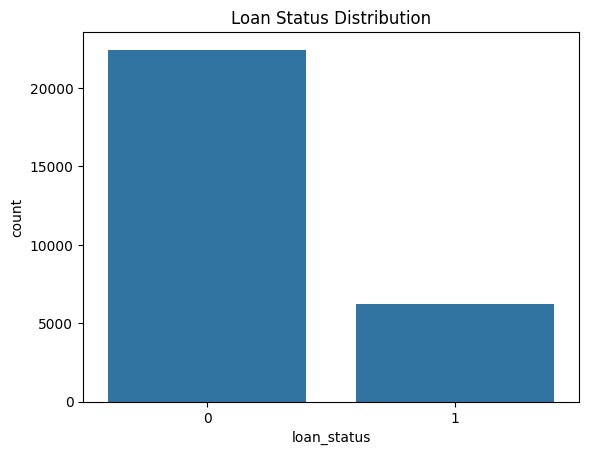

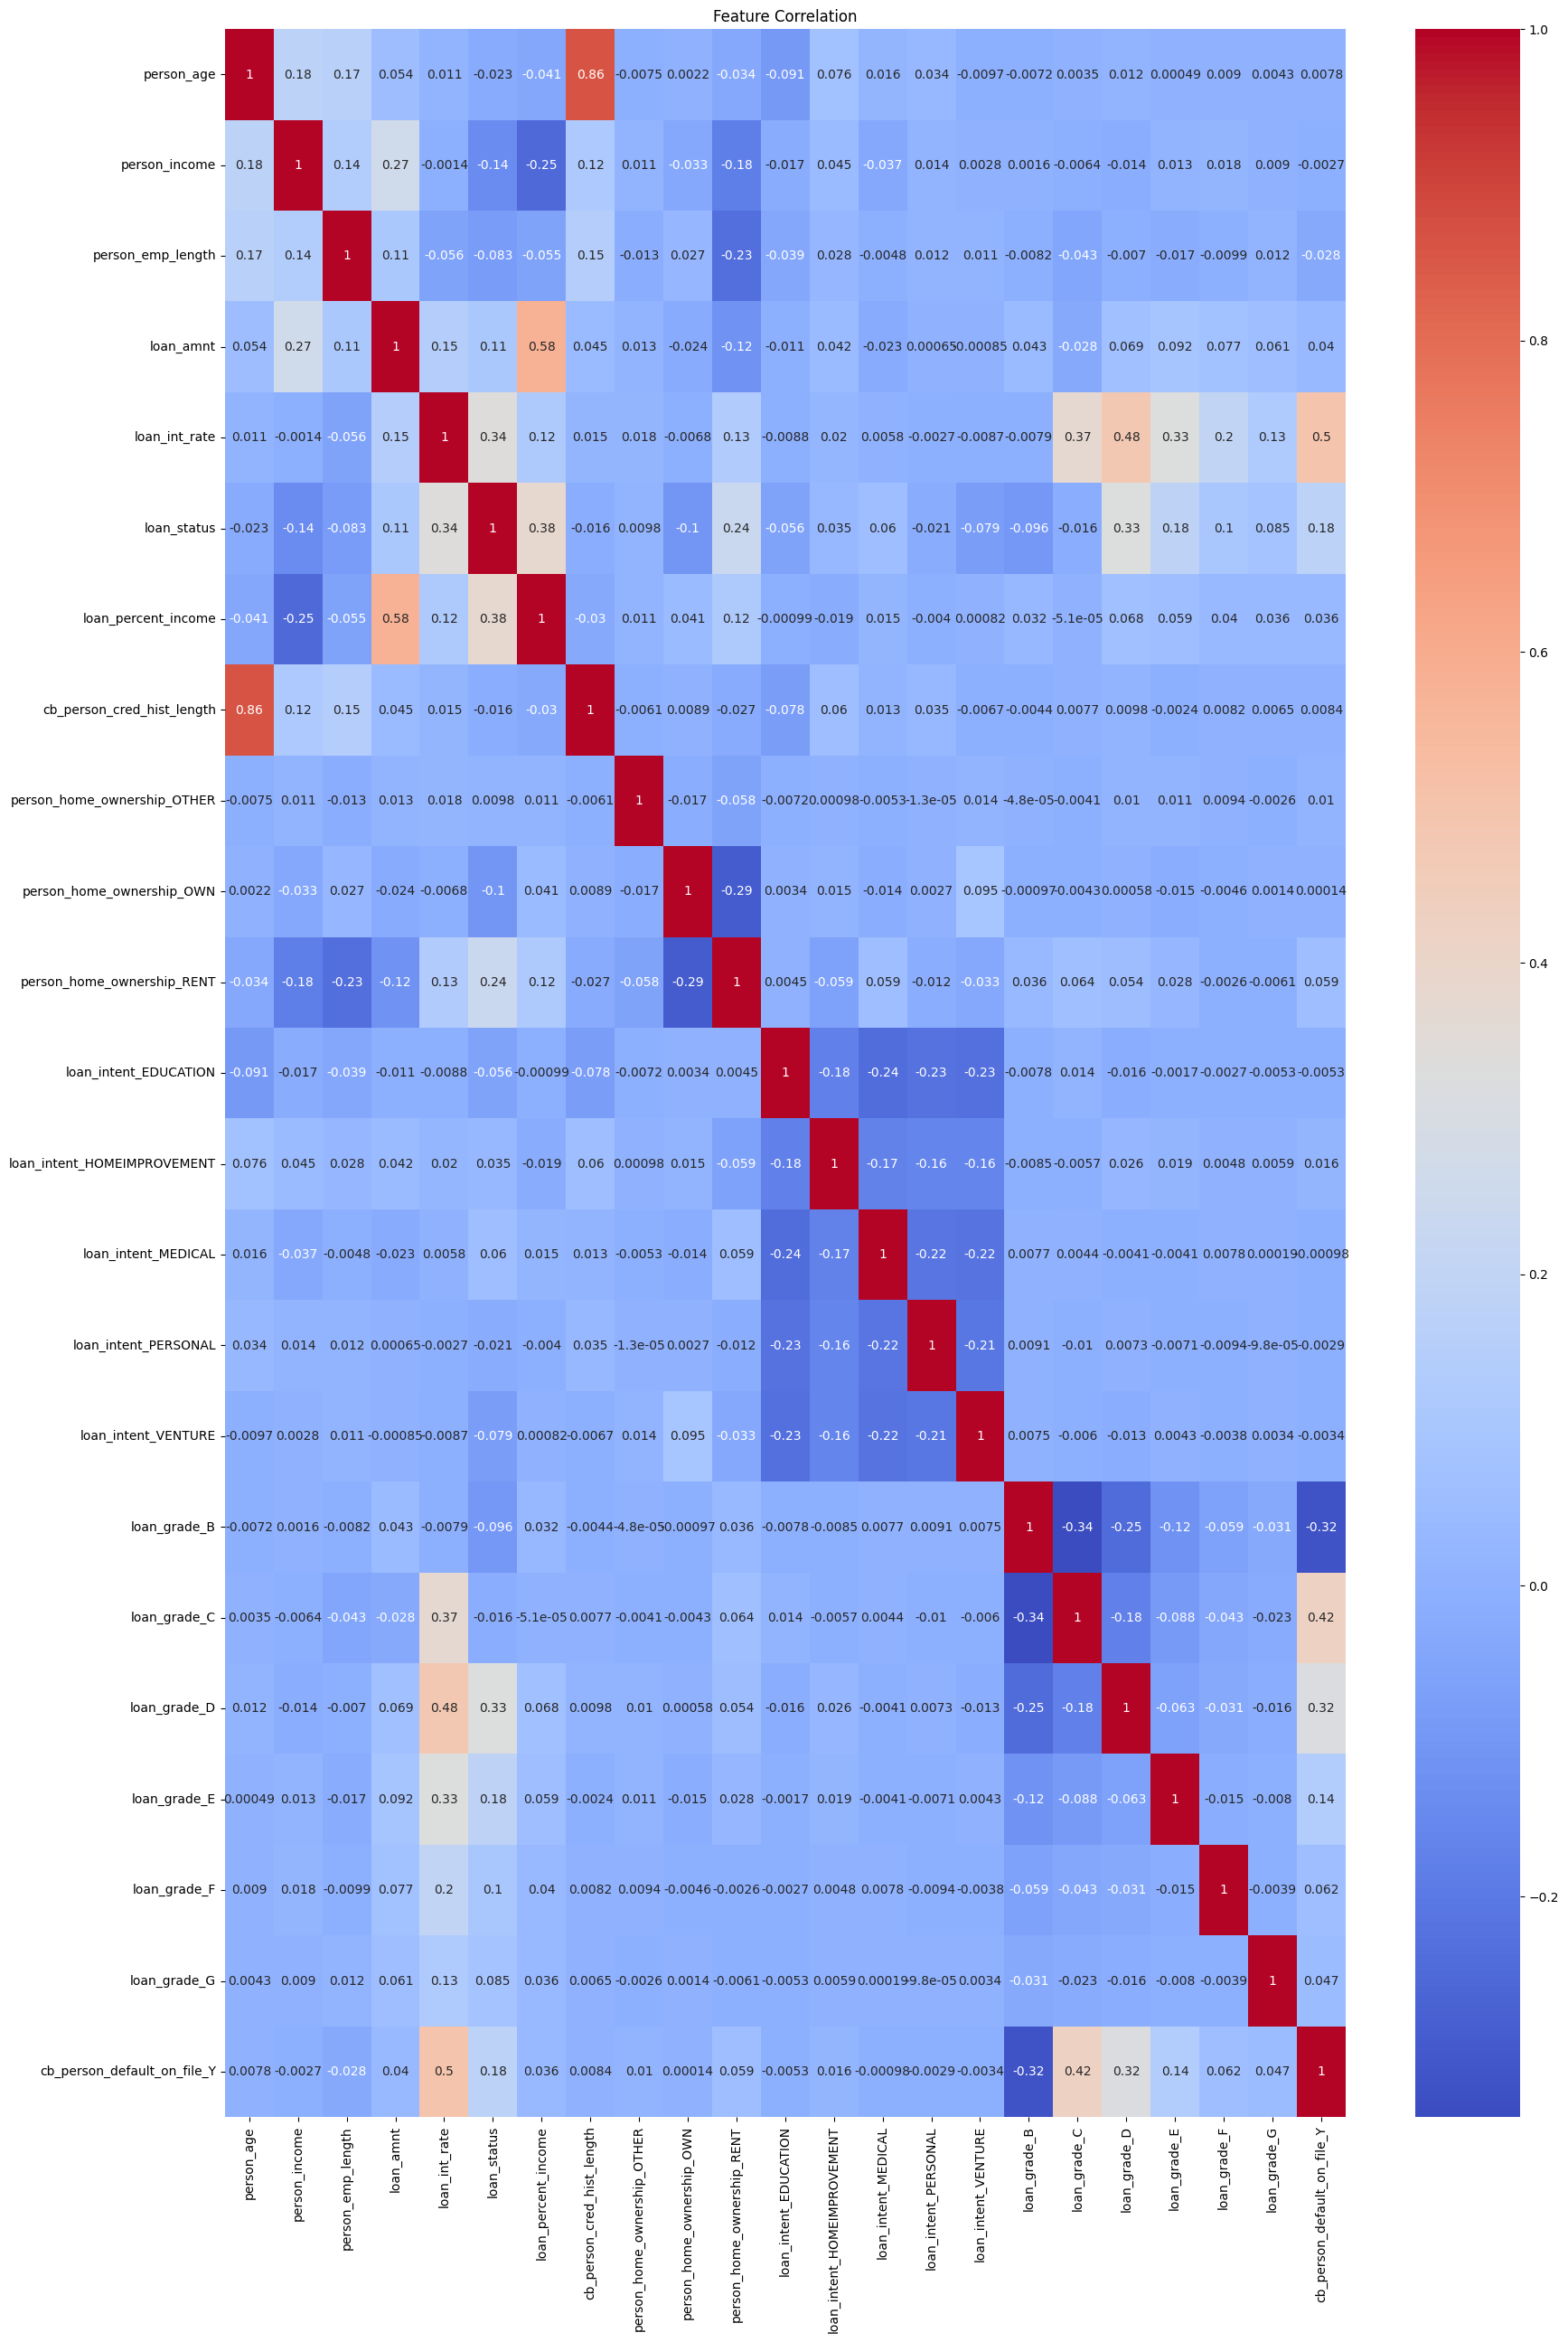

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.countplot(x='loan_status', data=data)
plt.title('Loan Status Distribution')
plt.show()

corr = data.corr()
plt.figure(figsize=(20, 30))
sns.heatmap(corr, cmap='coolwarm', annot=True)
plt.title('Feature Correlation')
plt.show()


# Training a Random Forest Classifier and Evaluating Its Performance on the Credit Risk Dataset

In [23]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, f1_score

model = RandomForestClassifier(random_state = 42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print(f'ROC-AUC Score: {roc_auc}')
print(f'F1 Score: {f1}')


Accuracy: 0.9310405027932961
ROC-AUC Score: 0.8562599673687724
F1 Score: 0.8242100578549176


In [24]:
np.sqrt(mean_squared_error(y_test, y_pred))

0.2626014036647632

# Optimizing Random Forest Hyperparameters Using Grid Search and Evaluating the Best Model

In [28]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

grid_search = GridSearchCV(model, param_grid, cv=3, scoring='roc_auc')
grid_search.fit(X_train, y_train)

best_model = grid_search.best_estimator_

y_pred_best = best_model.predict(X_test)

accuracy_best = accuracy_score(y_test, y_pred_best)
roc_auc_best = roc_auc_score(y_test, y_pred_best)
f1_best = f1_score(y_test, y_pred_best)

print(f'Best Model Accuracy: {accuracy_best}')
print(f'Best Model ROC-AUC Score: {roc_auc_best}')
print(f'Best Model F1 Score: {f1_best}')


Best Model Accuracy: 0.9299930167597765
Best Model ROC-AUC Score: 0.8533722000506198
Best Model F1 Score: 0.8207420652659813


# Identifying and Visualizing Feature Importances of the Optimized Random Forest Model

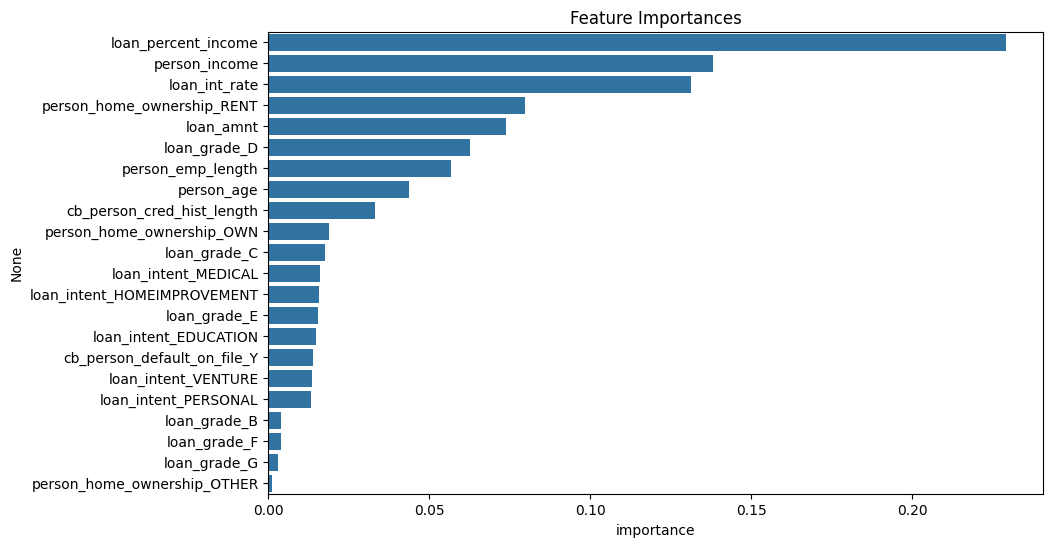

In [30]:
feature_importances = pd.DataFrame(best_model.feature_importances_, index=X_train.columns, columns=['importance']).sort_values('importance', ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(x='importance', y=feature_importances.index, data=feature_importances)
plt.title('Feature Importances')
plt.show()
